In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

<ipython-input-2-da606197d11b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [5]:
await download(filepath, "insurance.csv")
file_name="insurance.csv"

In [6]:
df = pd.read_csv(file_name)

In [10]:
df = pd.read_csv(file_name, header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [12]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [11]:
df.replace('?',np.nan,inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB


In [18]:
df[['age','no_of_children']] = df[['age','no_of_children']].astype(float)
df[['smoker']] = df[['smoker']].astype(float)
df['age'].fillna(df['age'].mean(),inplace = True)
df['smoker'].fillna(df['smoker'].mode()[0],inplace=True)
print(df.info())

<ipython-input-18-859a54ea1257>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace = True)
<ipython-input-18-859a54ea1257>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   float64
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   float64
 4   smoker          2772 non-null   float64
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 151.7 KB
None


In [19]:
df[['charges']] = np.round(df[['charges']],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0.0,1.0,3,16884.92
1,18.0,2,33.770,1.0,0.0,4,1725.55
2,28.0,2,33.000,3.0,0.0,4,4449.46
3,33.0,2,22.705,0.0,0.0,1,21984.47
4,32.0,2,28.880,0.0,0.0,1,3866.86


(0.0, 66902.85800000001)

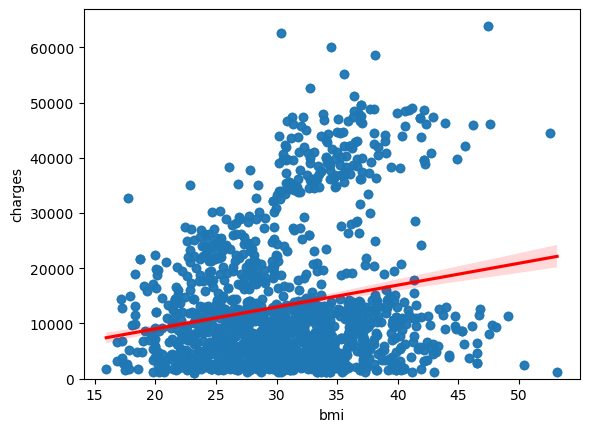

In [26]:
sns.regplot(x ='bmi',y='charges',data=df, line_kws={'color':'red'})
plt.ylim(0,)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

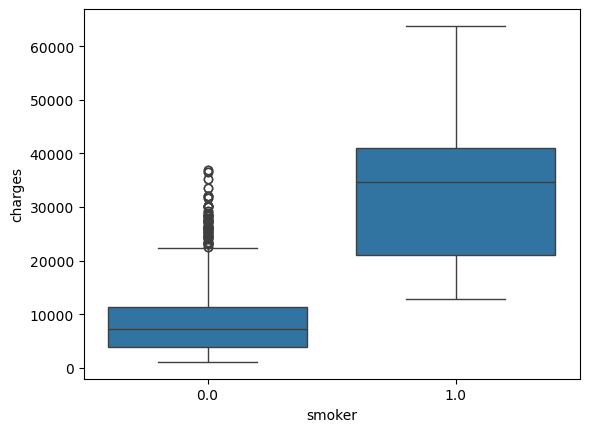

In [28]:
sns.boxplot(x='smoker',y='charges',data=df)

In [29]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026041,0.113045,0.037585,-0.023285,-0.007175,0.298622
gender,-0.026041,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113045,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037585,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023285,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007175,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298622,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [31]:
lr = LinearRegression()
X = df[['smoker']]
Y = df['charges']
lr.fit(X,Y)
print(lr.score(X,Y))

0.6221791733924185


In [33]:
Z = df[["age", "gender", "bmi", "no_of_children", "region","smoker"]]
Y = df['charges']
lm1 = LinearRegression()
lm1.fit(Z,Y)
print(lm1.score(Z,Y))

0.7504063772187107


In [38]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452493369576476


In [40]:
x_train , x_test , y_train , y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [41]:
Rige = Ridge(alpha=0.1)
Rige.fit(x_train,y_train)
yhat = Rige.predict(x_test)
print(r2_score(y_test,yhat))

0.6760802462837339


In [44]:
poly = PolynomialFeatures(degree = 2)
x_train_p = poly.fit_transform(x_train) 
x_test_p = poly.transform(x_test)
Rige.fit(x_train_p,y_train)
yhat1 = Rige.predict(x_test_p)
print(r2_score(y_test,yhat1))

0.7835630578755264
